Plotly

In [1]:
%run datasciencePD.ipynb ## importing data from other ipynb file
df

/var/folders/3d/cd67s1z90px5tmr4h9brrv580000gn/T/ipykernel_47584/4031020327.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  people_df.append({'FNAME':'Aaron'},ignore_index=True) ##appending a name and setting ignore index to true to auto assign index
/var/folders/3d/cd67s1z90px5tmr4h9brrv580000gn/T/ipykernel_47584/1910579623.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  people_df=people_df.append(p2_df,ignore_index=True) ##


MainBranch  \
ResponseId                                                      
1                                               None of these   
2                              I am a developer by profession   
3           I am not primarily a developer, but I write co...   
4                              I am a developer by profession   
5                              I am a developer by profession   
...                                                       ...   
73264                          I am a developer by profession   
73265                          I am a developer by profession   
73266       I am not primarily a developer, but I write co...   
73267                          I am a developer by profession   
73268       I used to be a developer by profession, but no...   

                                                   Employment  \
ResponseId                                                      
1                                                         NaN   
2                                         Employed, full-time   
3                                         Employed, full-time   
4                                         Employed, full-time   
5                                         Employed, full-time   
...                                                       ...   
73264                                     Employed, full-time   
73265                                     Employed, full-time   
73266                                     Employed, full-time   
73267                                     Employed, full-time   
73268       Independent contractor, freelancer, or self-em...   

                                      RemoteWork  \
ResponseId                                         
1                                            NaN   
2                                   Fully remote   
3           Hybrid (some remote, some in-person)   
4                                   Fully remote   
5           Hybrid (some remote, some in-person)   
...                                          ...   
73264                               Fully remote   
73265                             Full in-person   
73266       Hybrid (some remote, some in-person)   
73267       Hybrid (some remote, some in-person)   
73268                               Fully remote   

                                             CodingActivities  \
ResponseId                                                      
1                                                         NaN   
2                    Hobby;Contribute to open-source projects   
3                                                       Hobby   
4                                I don’t code outside of work   
5                                                       Hobby   
...                                                       ...   
73264                                 Freelance/contract work   
73265                                                   Hobby   
73266                           Hobby;School or academic work   
73267                                                   Hobby   
73268       Hobby;Contribute to open-source projects;Boots...   

                                                    EdLevel  \
ResponseId                                                    
1                                                       NaN   
2                                                       NaN   
3           Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
4              Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
5              Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
...                                                     ...   
73264          Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
73265       Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
73266          Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
73267          Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
73268          Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                

In [2]:
import pandas as pd ## importing pandas numpy and plotly
import numpy as np
import plotly.express as xp

x_data = np.random.random(100)
y_data = np.random.random(100)

fig = xp.scatter(x=x_data,y=y_data) ## creating scatter plot of data from plotly
fig.show()

In [3]:
comp_filt = (df['ConvertedCompYearly'] >= 0)## getting filtered data for available comp, and the data at of age and years code at those points
total_comp = df.loc[comp_filt,'ConvertedCompYearly']
experience = df.loc[comp_filt,'YearsCodePro']
age = df.loc[comp_filt,'Age'].str.split('-',expand=True)[0] ##splitting age response into 2 vals and getting the first portion

df2 = pd.concat([total_comp,experience,age],axis='columns').rename(columns={'ConvertedCompYearly':'Comp','YearsCodePro':'Experience', 0:'Age'})


In [4]:

df2['Age'].replace('65 years or older',65,inplace=True)
df2['Age'].replace('Under 18 years old',17,inplace=True)
df2.replace('Prefer not to say',np.nan,inplace=True)
df2.dropna(axis='index',how='any',inplace=True)



In [5]:
df2['Experience'].unique()
df2['Experience'].replace('Less than 1 year',0,inplace=True)
df2['Experience'].replace('More than 50 years',51,inplace=True)
df2 = df2.astype(float)


In [8]:
fig = xp.scatter(df2,x='Experience',y='Comp',size='Age',color="Age",hover_name='Comp',color_continuous_scale='ice')#scatter of xperience vs comp with size and color for age
fig.show()


Seaborn

In [9]:
## built on top of matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [12]:
print(sb.get_dataset_names()) ## seaborn provided data sets

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [14]:
crash = sb.load_dataset('car_crashes')
crash

total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0    18.8     7.332    5.640          18.048       15.040       784.55   
1    18.1     7.421    4.525          16.290       17.014      1053.48   
2    18.6     6.510    5.208          15.624       17.856       899.47   
3    22.4     4.032    5.824          21.056       21.280       827.34   
4    12.0     4.200    3.360          10.920       10.680       878.41   
5    13.6     5.032    3.808          10.744       12.920       835.50   
6    10.8     4.968    3.888           9.396        8.856      1068.73   
7    16.2     6.156    4.860          14.094       16.038      1137.87   
8     5.9     2.006    1.593           5.900        5.900      1273.89   
9    17.9     3.759    5.191          16.468       16.826      1160.13   
10   15.6     2.964    3.900          14.820       14.508       913.15   
11   17.5     9.450    7.175          14.350       15.225       861.18   
12   15.3     5.508    4.437          13.005       14.994       641.96   
13   12.8     4.608    4.352          12.032       12.288       803.11   
14   14.5     3.625    4.205          13.775       13.775       710.46   
15   15.7     2.669    3.925          15.229       13.659       649.06   
16   17.8     4.806    4.272          13.706       15.130       780.45   
17   21.4     4.066    4.922          16.692       16.264       872.51   
18   20.5     7.175    6.765          14.965       20.090      1281.55   
19   15.1     5.738    4.530          13.137       12.684       661.88   
20   12.5     4.250    4.000           8.875       12.375      1048.78   
21    8.2     1.886    2.870           7.134        6.560      1011.14   
22   14.1     3.384    3.948          13.395       10.857      1110.61   
23    9.6     2.208    2.784           8.448        8.448       777.18   
24   17.6     2.640    5.456           1.760       17.600       896.07   
25   16.1     6.923    5.474          14.812       13.524       790.32   
26   21.4     8.346    9.416          17.976       18.190       816.21   
27   14.9     1.937    5.215          13.857       13.410       732.28   
28   14.7     5.439    4.704          13.965       14.553      1029.87   
29   11.6     4.060    3.480          10.092        9.628       746.54   
30   11.2     1.792    3.136           9.632        8.736      1301.52   
31   18.4     3.496    4.968          12.328       18.032       869.85   
32   12.3     3.936    3.567          10.824        9.840      1234.31   
33   16.8     6.552    5.208          15.792       13.608       708.24   
34   23.9     5.497   10.038          23.661       20.554       688.75   
35   14.1     3.948    4.794          13.959       11.562       697.73   
36   19.9     6.368    5.771          18.308       18.706       881.51   
37   12.8     4.224    3.328           8.576       11.520       804.71   
38   18.2     9.100    5.642          17.472       16.016       905.99   
39   11.1     3.774    4.218          10.212        8.769      1148.99   
40   23.9     9.082    9.799          22.944       19.359       858.97   
41   19.4     6.014    6.402          19.012       16.684       669.31   
42   19.5     4.095    5.655          15.990       15.795       767.91   
43   19.4     7.760    7.372          17.654       16.878      1004.75   
44   11.3     4.859    1.808           9.944       10.848       809.38   
45   13.6     4.080    4.080          13.056       12.920       716.20   
46   12.7     2.413    3.429          11.049       11.176       768.95   
47   10.6     4.452    3.498           8.692        9.116       890.03   
48   23.8     8.092    6.664          23.086       20.706       992.61   
49   13.8     4.968    4.554           5.382       11.592       670.31   
50   17.4     7.308    5.568          14.094       15.660       791.14   

    ins_losses abbrev  
0       145.08     AL  
1       133.93     AK  
2       110.35     AZ  
3       142.39     AR  
4       165.63     CA  
5       139

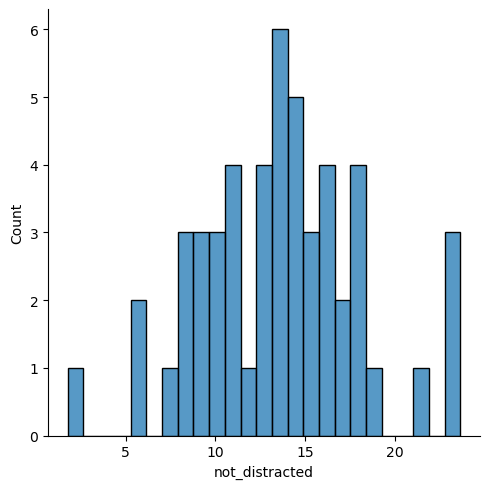

In [17]:
##distribution plot - distribution for one variable
sb.displot(crash['not_distracted'],bins=25) ##bins will determine num of buckets we see

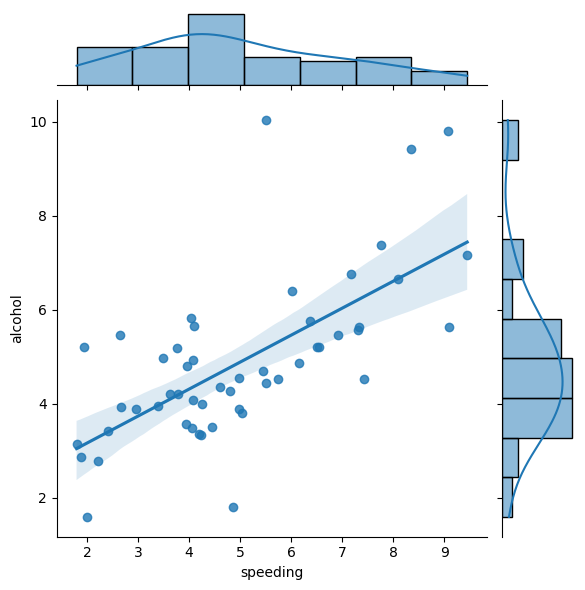

In [18]:
##joint plot - used to compare 2 distribution as a scatter
sb.jointplot(x='speeding',y='alcohol',data= crash,kind='reg')

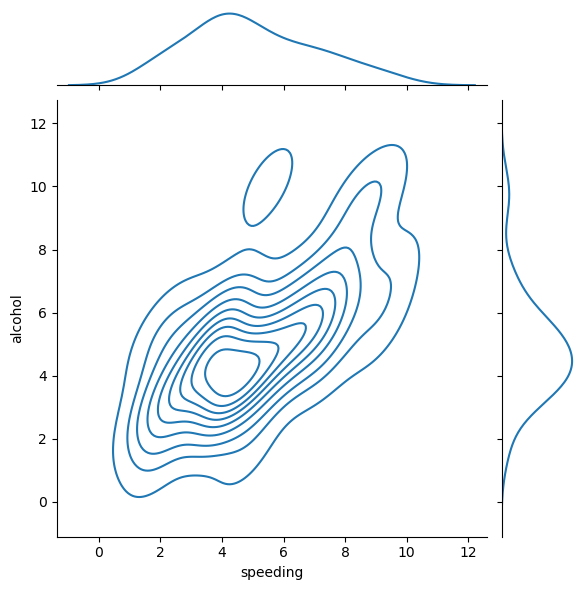

In [19]:
)sb.jointplot(x='speeding',y='alcohol',data= crash,kind='kde' ##kde is kernel density estimation

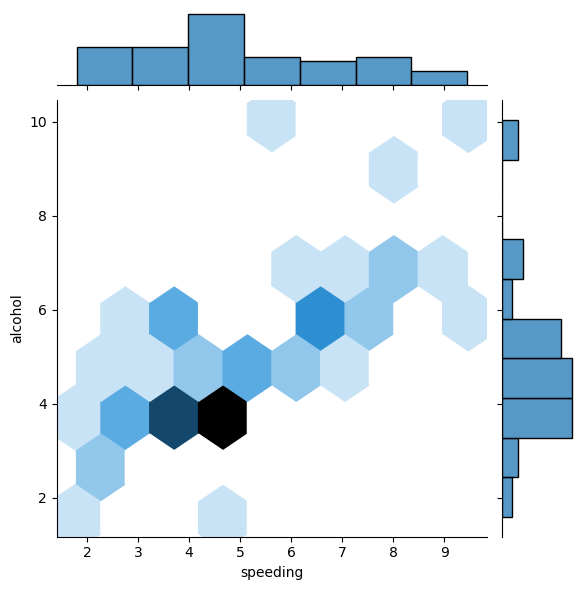

In [20]:
sb.jointplot(x='speeding',y='alcohol',data= crash,kind='hex')

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

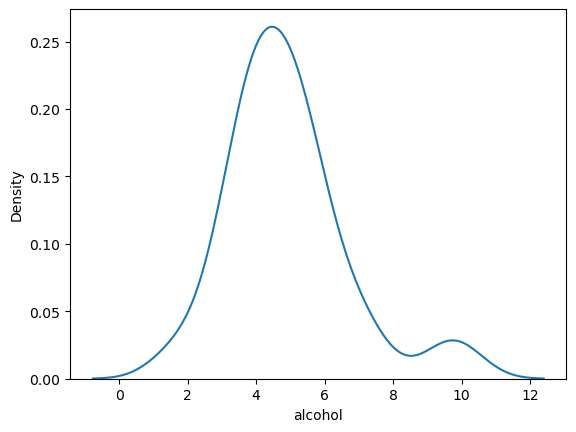

In [21]:
sb.kdeplot(crash['alcohol']) ##kde plot

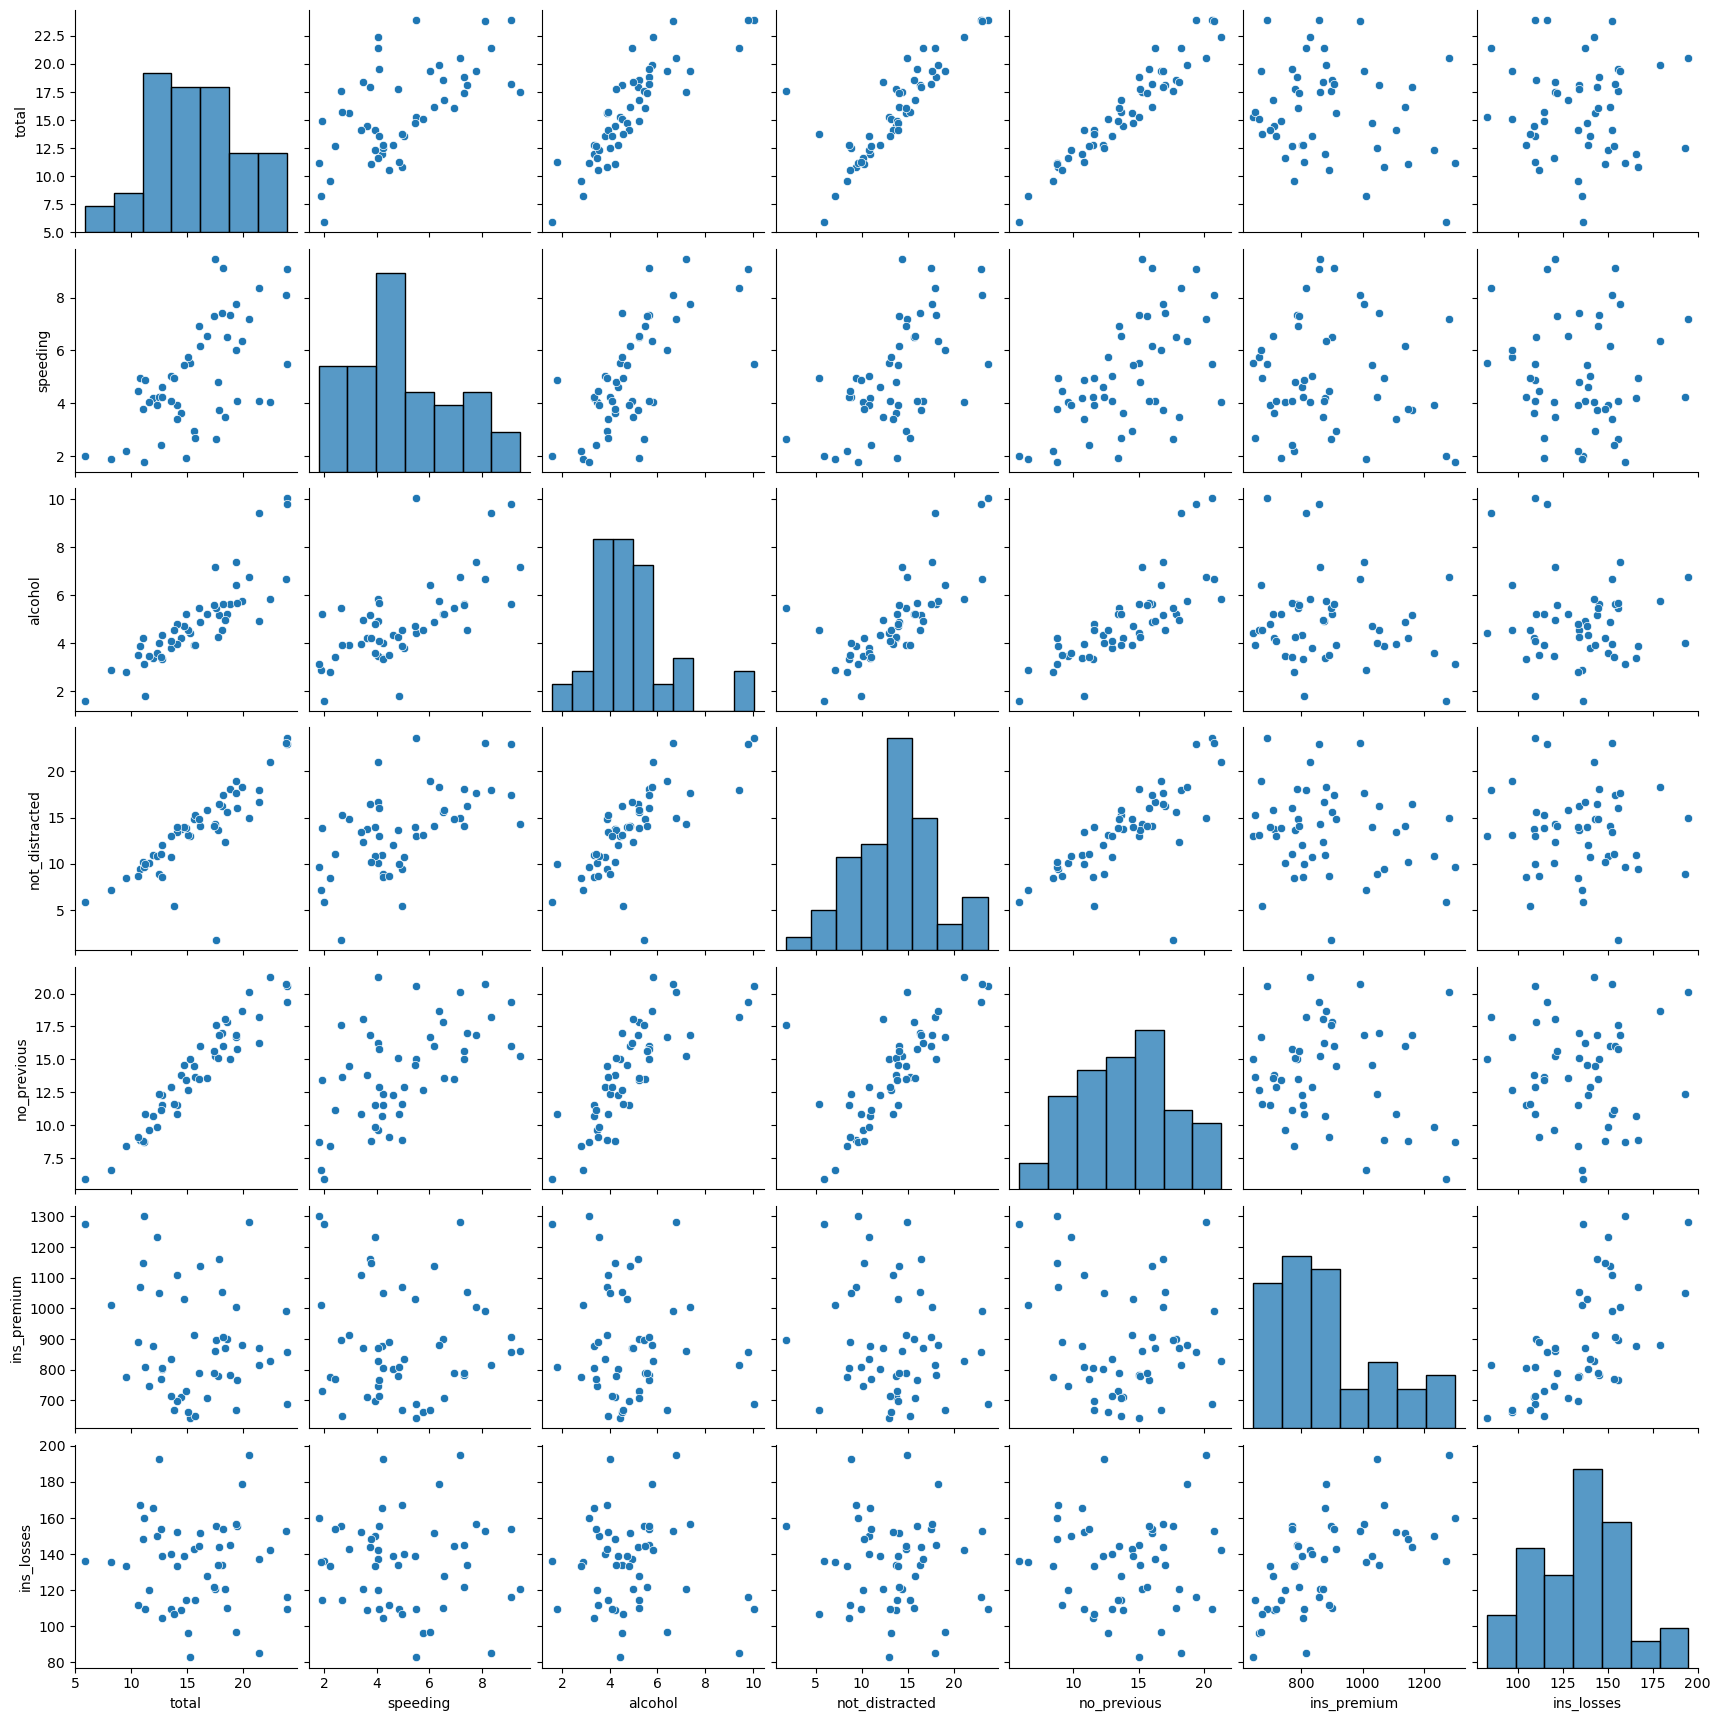

In [22]:
## pair plots - distribution plot w relationship across num values
sb.pairplot(crash) ## pairs of all our data

In [23]:
tips=sb.load_dataset('tips')

In [24]:
tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

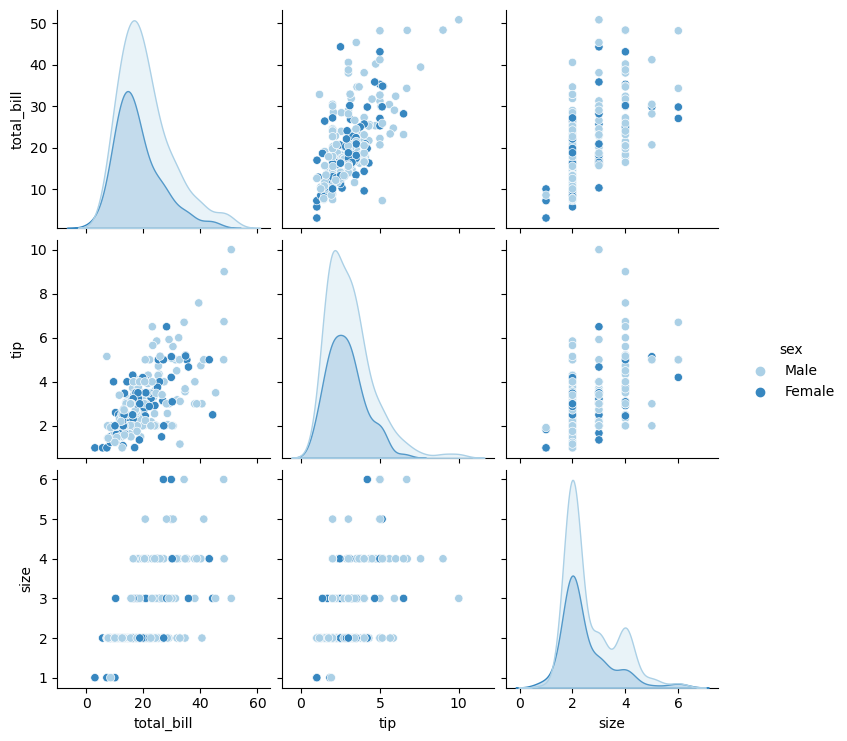

In [25]:
sb.pairplot(tips,hue='sex',palette='Blues') ## hue lets us stylize a partivular data series and pallete is for color choice

<AxesSubplot:xlabel='tip'>

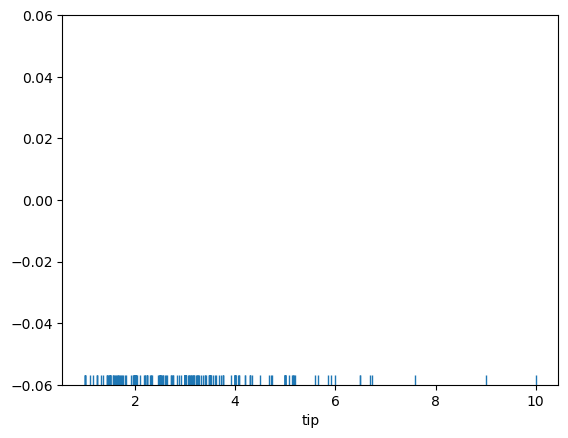

In [26]:
##rug plot will show us sticks where values are more common
sb.rugplot(tips['tip'])

<Figure size 800x400 with 0 Axes>

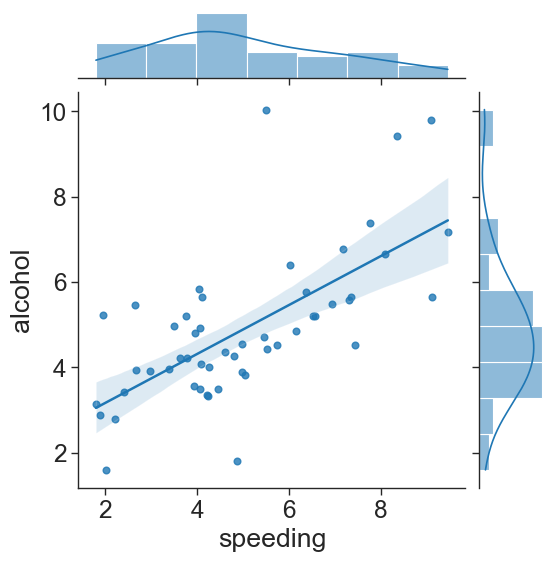

In [44]:
##styling for axis and grid
sb.set_style('ticks')##setting chart background style
plt.figure(figsize=(8,4))##setting fig size
sb.set_context('paper',font_scale=2) ## setting text size
sb.despine(left=True,right=False)## setting axis to on or off
sb.jointplot(x='speeding',y='alcohol',data=crash,kind='reg')

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

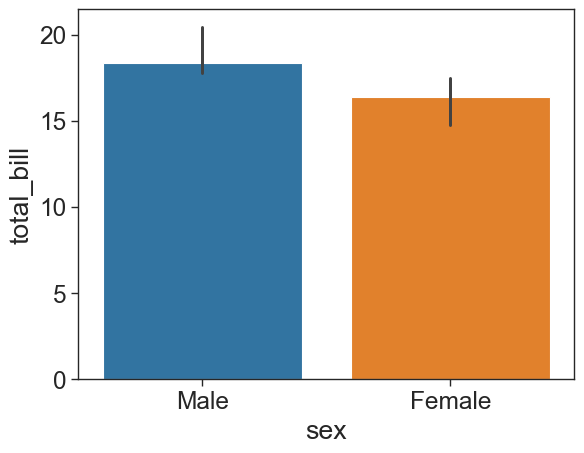

In [46]:
## categorical plots - bar plot
sb.barplot(x='sex',y='total_bill',data=tips,estimator=np.median)## bar plot but using median instead

<AxesSubplot:xlabel='sex', ylabel='count'>

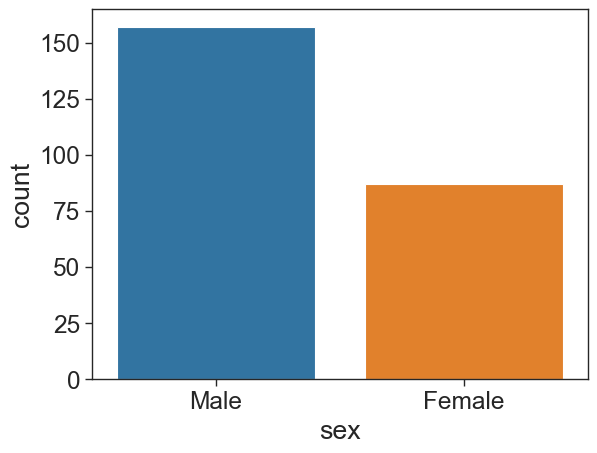

In [47]:
##count plot - estimator will count num of occurences
sb.countplot(data=tips,x='sex')

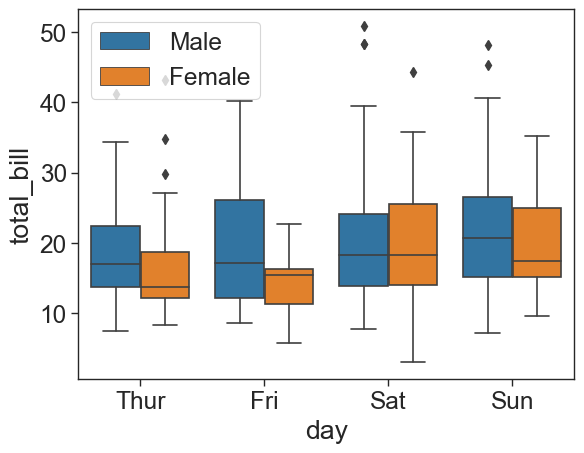

In [49]:
##box plot will compare diff variables
sb.boxplot(data=tips,x='day',y='total_bill',hue='sex')
plt.legend(loc=0)## reposition legend

<AxesSubplot:xlabel='day', ylabel='total_bill'>

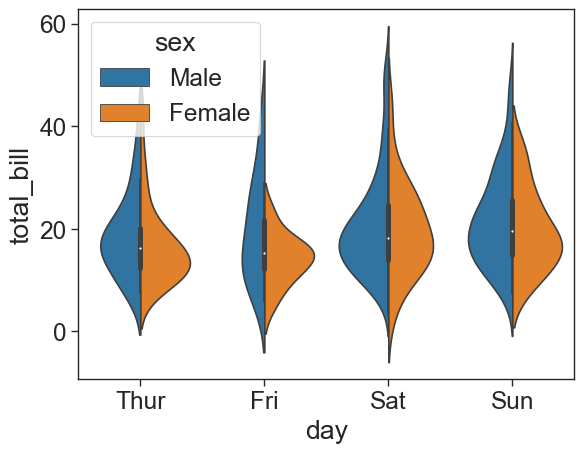

In [51]:
##violin plot - combo of kde and box plot
sb.violinplot(data=tips,y= 'total_bill',hue='sex',x='day',split=True)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

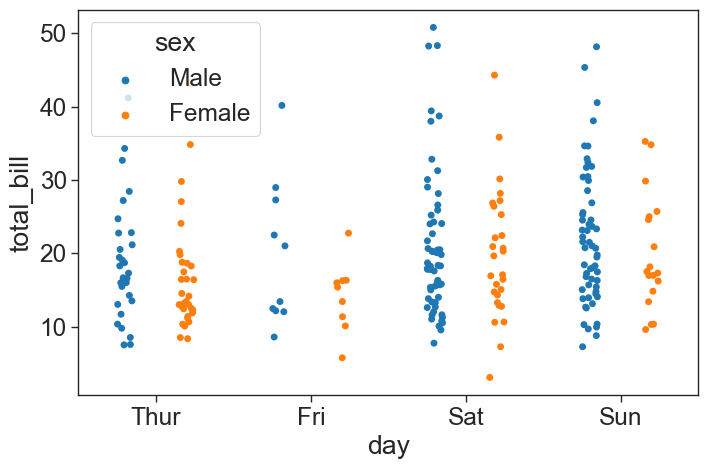

In [56]:
##strip plot
plt.figure(figsize=(8,5))

sb.stripplot(data=tips,x='day',y='total_bill',jitter=True,hue='sex',dodge=True) ## jitter will unstack data and dodge will set the hue variables to their own space


<AxesSubplot:xlabel='day', ylabel='total_bill'>

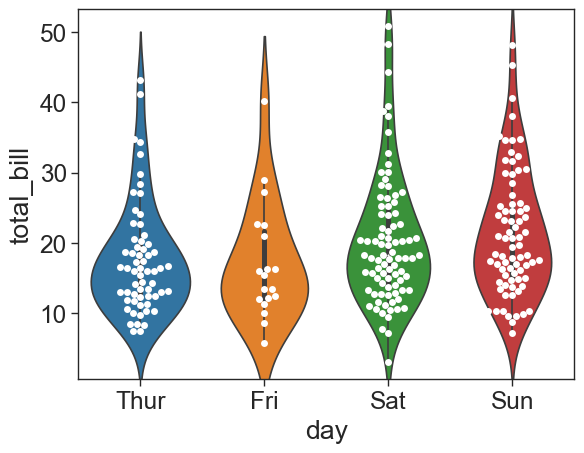

In [59]:
##swarm plot
sb.violinplot(data=tips,x='day',y='total_bill')
sb.swarmplot(data=tips,x='day',y='total_bill',color='white')

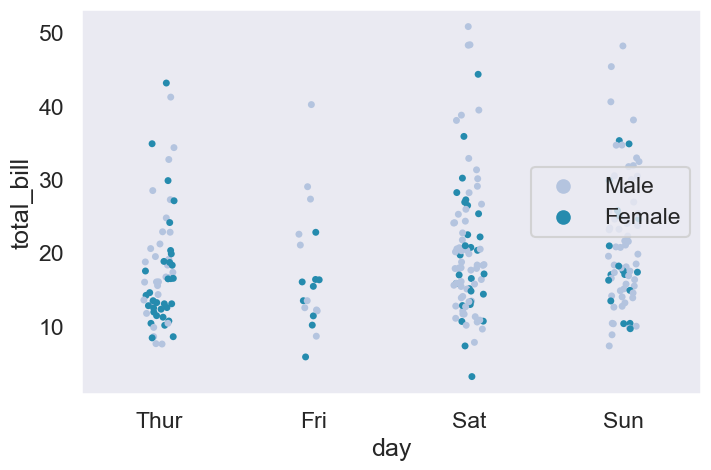

In [65]:
##palatte and style

plt.figure(figsize=(8,5))## plot size
sb.set_style('dark')##plot back ground
sb.set_context('talk') ##plot typeface
sb.stripplot(data=tips,x='day',y='total_bill',hue='sex',palette='PuBuGn') ##pallete will let us change the color
plt.legend(loc=5) ## changing legend location

/var/folders/3d/cd67s1z90px5tmr4h9brrv580000gn/T/ipykernel_47584/3040285563.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot:>

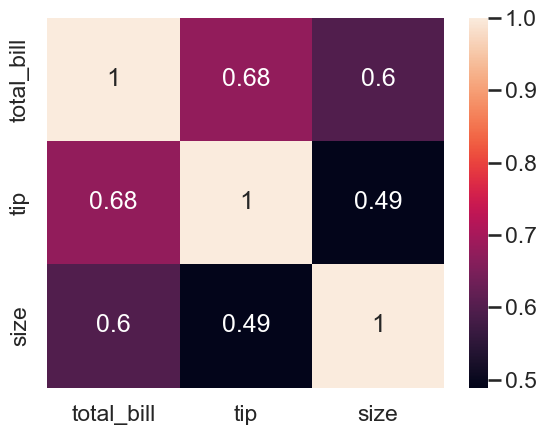

In [68]:
## matrix plot - heat map
## matrix data will need the df to be in a matrix as well
tipsmx = tips.corr() ## creating matrix by getting data correlation with each other
sb.heatmap(data=tipsmx,annot=True)

In [69]:
flight = sb.load_dataset('flights')

In [71]:
flight = flight.pivot_table(index='month',columns='year',values='passengers')

In [72]:
flight

year   1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  1960
month                                                                        
Jan     112   115   145   171   196   204   242   284   315   340   360   417
Feb     118   126   150   180   196   188   233   277   301   318   342   391
Mar     132   141   178   193   236   235   267   317   356   362   406   419
Apr     129   135   163   181   235   227   269   313   348   348   396   461
May     121   125   172   183   229   234   270   318   355   363   420   472
Jun     135   149   178   218   243   264   315   374   422   435   472   535
Jul     148   170   199   230   264   302   364   413   465   491   548   622
Aug     148   170   199   242   272   293   347   405   467   505   559   606
Sep     136   158   184   209   237   259   312   355   404   404   463   508
Oct     119   133   162   191   211   229   274   306   347   359   407   461
Nov     104   114   146   172   180   203   237   271   305   310   362   390
Dec     118   140   166   194   201   229   278   306   336   337   405   432

<AxesSubplot:xlabel='year', ylabel='month'>

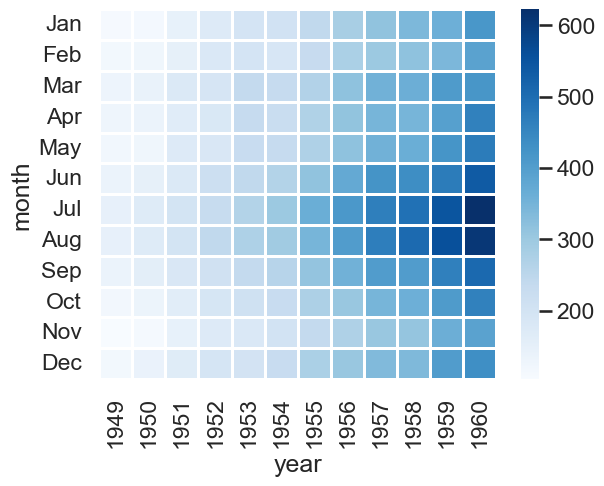

In [75]:
sb.heatmap(data=flight,cmap='Blues',linecolor='white',linewidth=1)

In [80]:
iris= sb.load_dataset('iris')

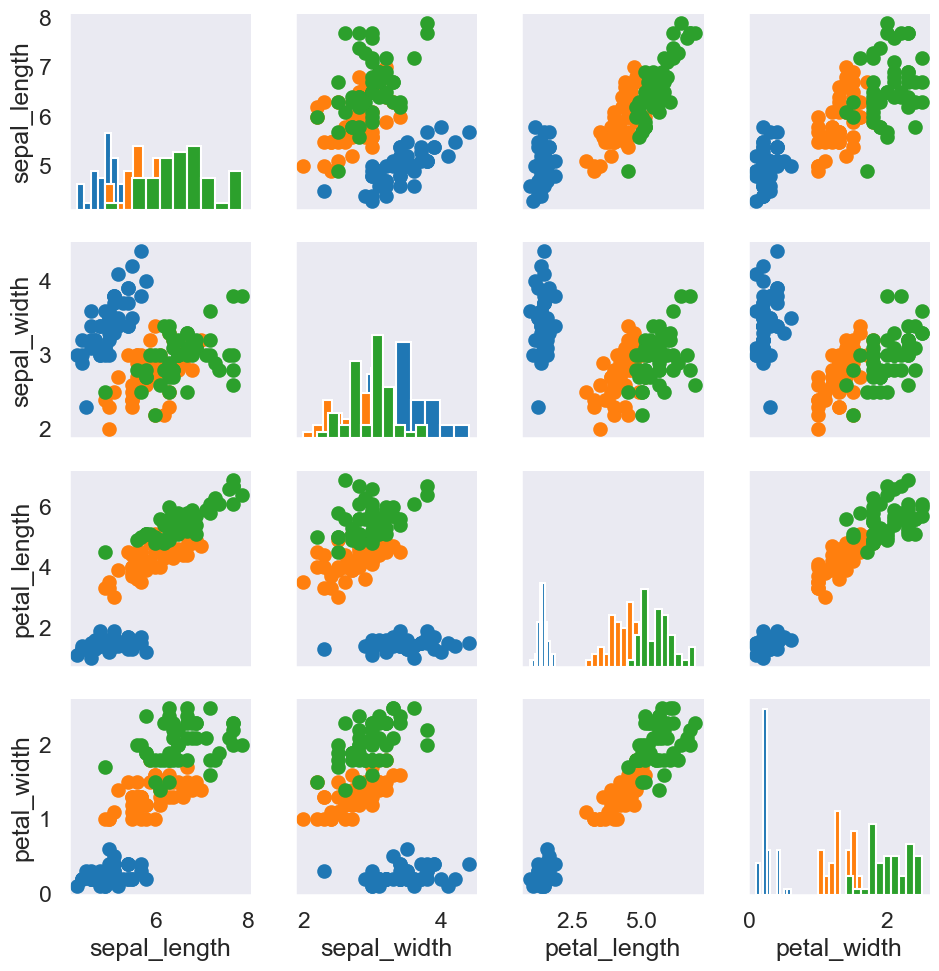

In [83]:
## pair grids
iris_g = sb.PairGrid(iris,hue='species')
iris_g.map_offdiag(plt.scatter)
iris_g.map_diag(plt.hist)## mapping histo to the diagnol plots

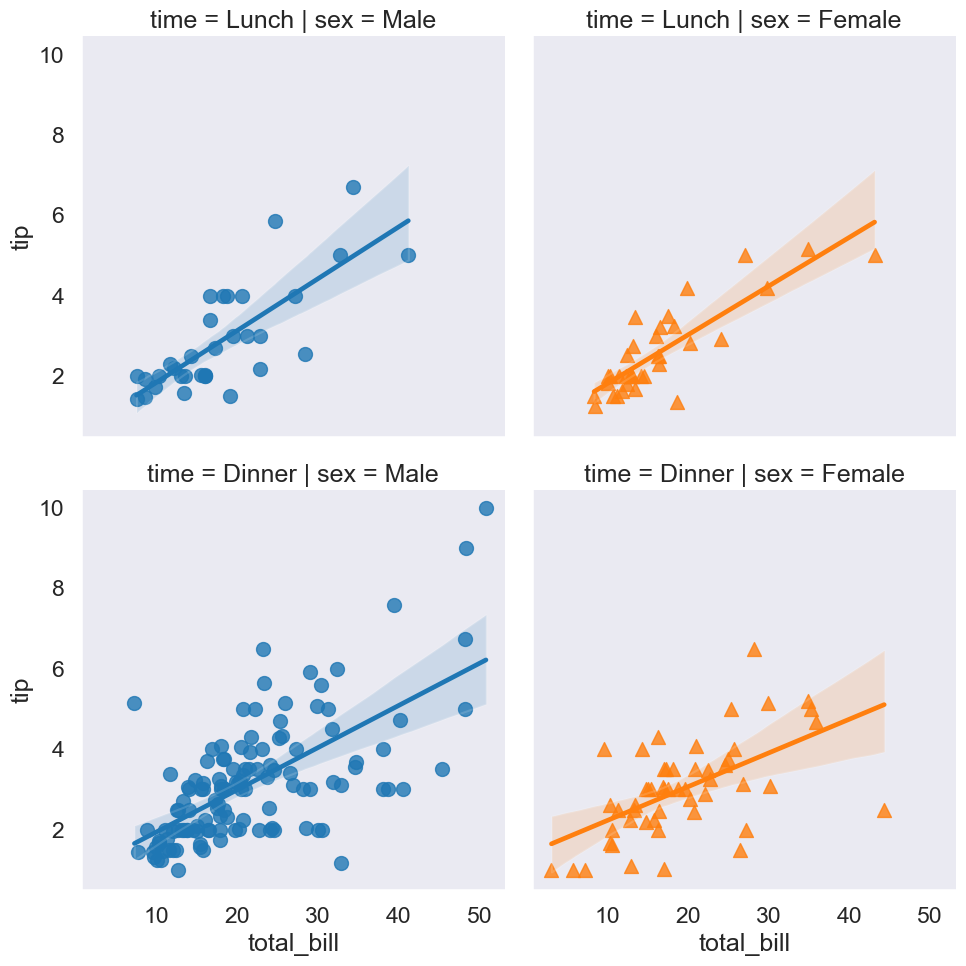

In [85]:
## regression plot
sb.lmplot(data=tips,x='total_bill',y='tip',hue='sex',markers=['o','^'],scatter_kws={'s':100,'linewidth':1},col='sex',row='time')